In [268]:
! pip install scikit-learn
! pip install matplotlib
! pip install seaborn
! pip install regex
! pip install missingno
! pip install matplotlib
! pip install regex
! pip install regex
! pip install missingno
! pip install pandas

You should consider upgrading via the 'c:\users\joeyp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\joeyp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\joeyp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\joeyp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\joeyp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\joeyp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\joeyp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\joeyp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


^C


You should consider upgrading via the 'c:\users\joeyp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\joeyp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [ ]:
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [ ]:
# data = pd.read_csv("gender_submission.csv")
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids=test["PassengerId"]
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
# df_gender=pd.read_csv("gender_submission.csv")


def clean(data):
    data=data.drop(["Ticket","Name", "PassengerId","Cabin"], axis=1)

    cols=["SibSp", "Parch", "Fare", "Age"]

    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
    data.Embarked.fillna("U", inplace=True)
    return data 
data = clean(data)
test = clean(test)


<AxesSubplot: >

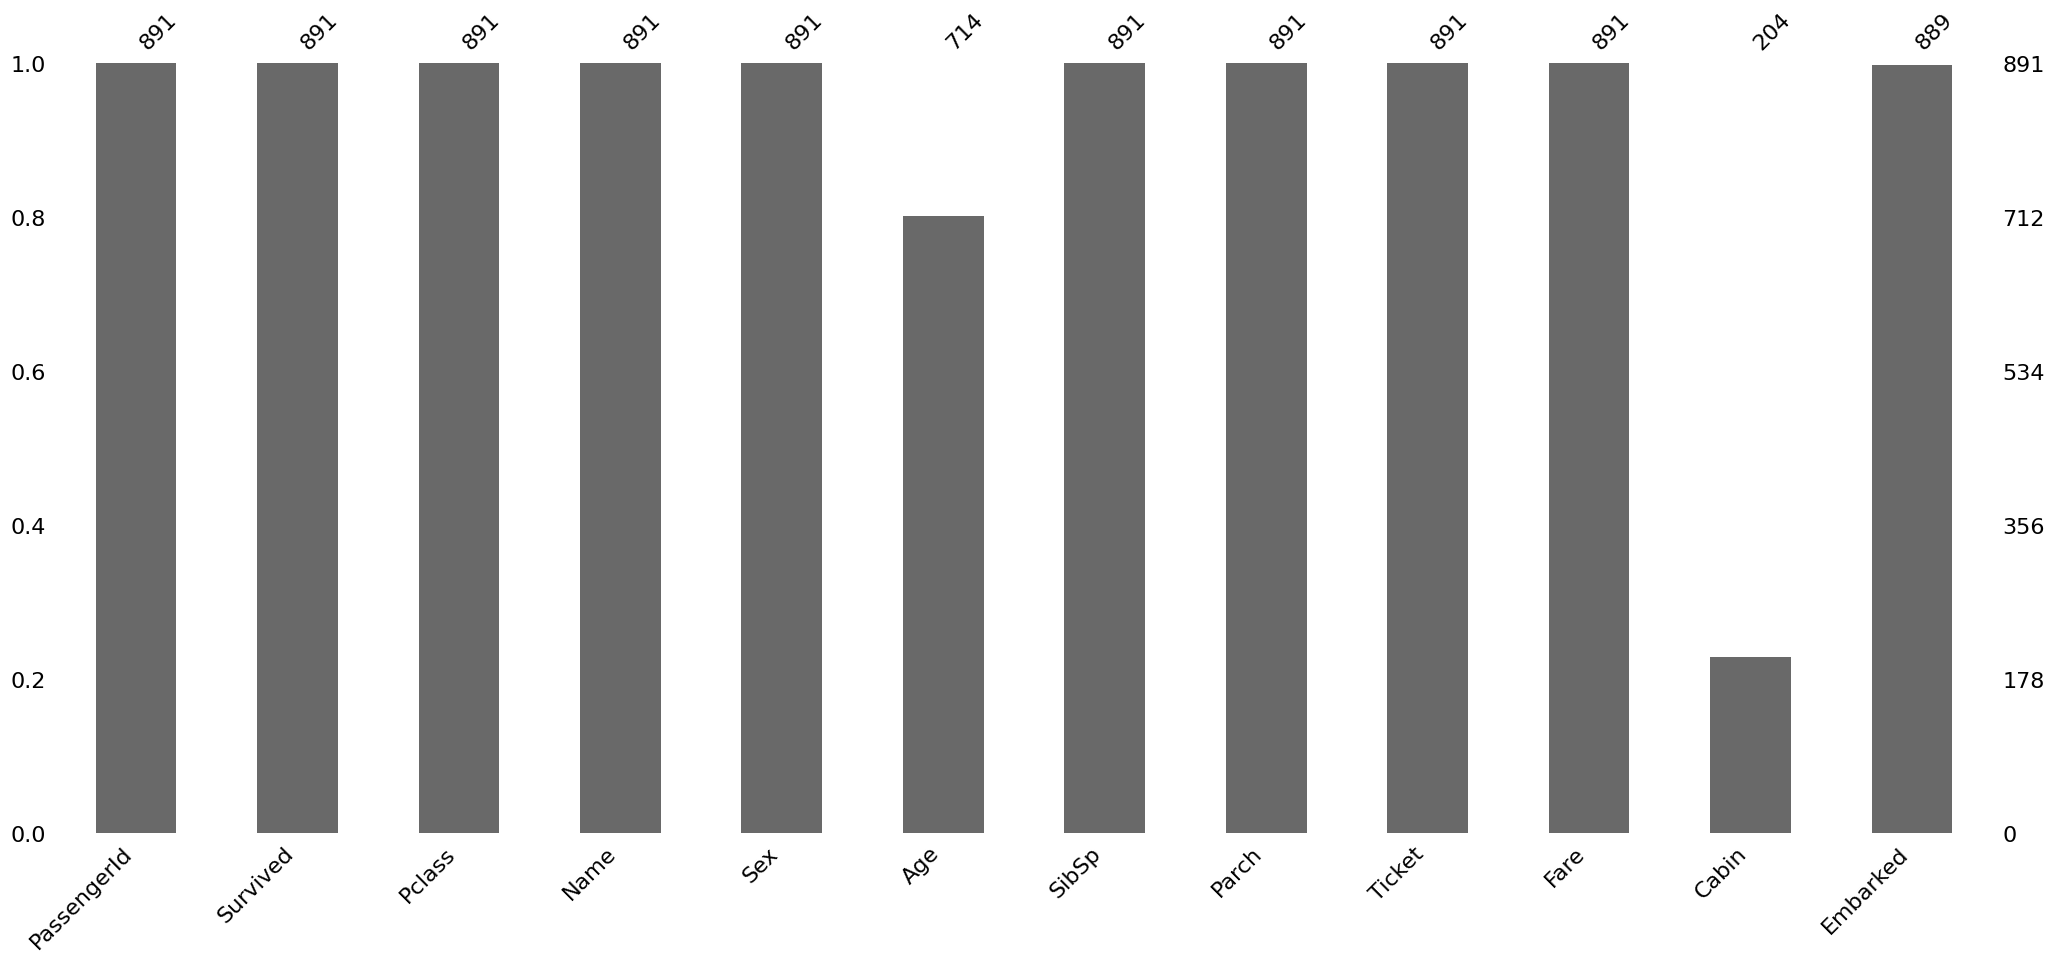

In [ ]:
# missing_data=pd.read_csv("gender_submission.csv"),pd.read_csv("train.csv"),pd.read_csv("test.csv")
msno.bar(df_train)

C:\Users\joeyp\AppData\Local\Temp\ipykernel_17668\690592952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="coolwarm")


<AxesSubplot: >

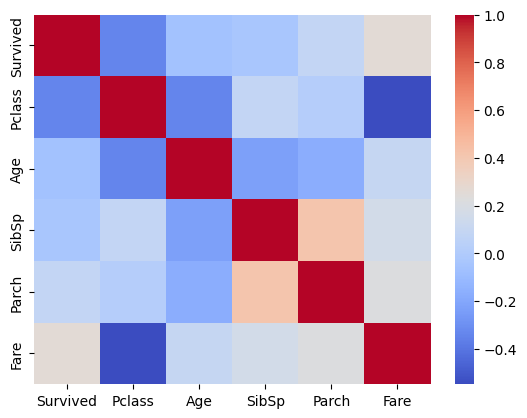

In [ ]:
sns.heatmap(data.corr(), cmap="coolwarm")

In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='count'>

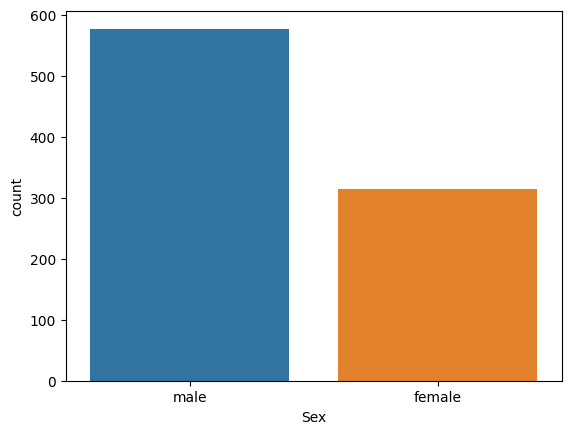

In [ ]:
sns.countplot(data, x="Sex")

<AxesSubplot: xlabel='Survived', ylabel='count'>

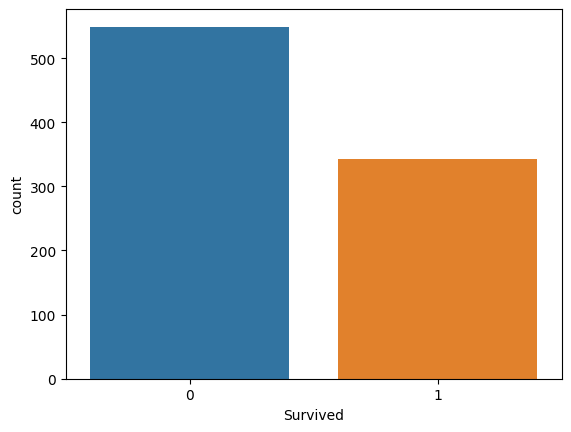

In [ ]:
sns.countplot(data, x="Survived")

In [ ]:
data["Survived"].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [ ]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot: xlabel='Survived', ylabel='count'>

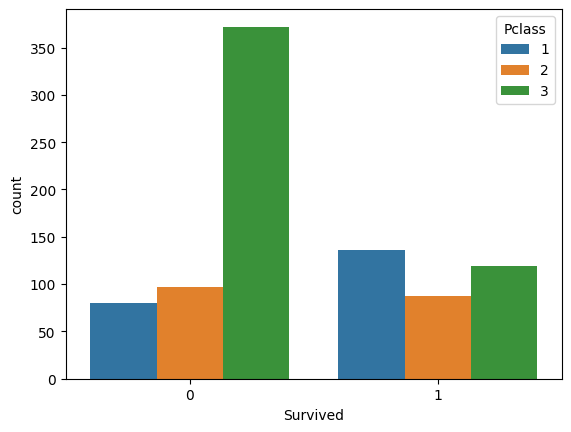

In [ ]:
sns.countplot(data,x="Survived", hue="Pclass")

In [ ]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot: xlabel='Survived', ylabel='count'>

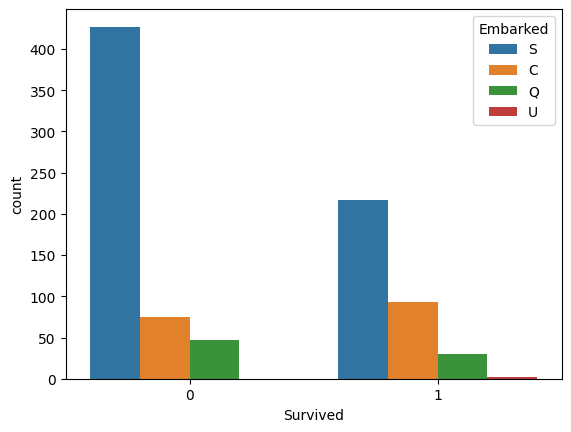

In [ ]:
sns.countplot(data, x="Survived", hue="Embarked")


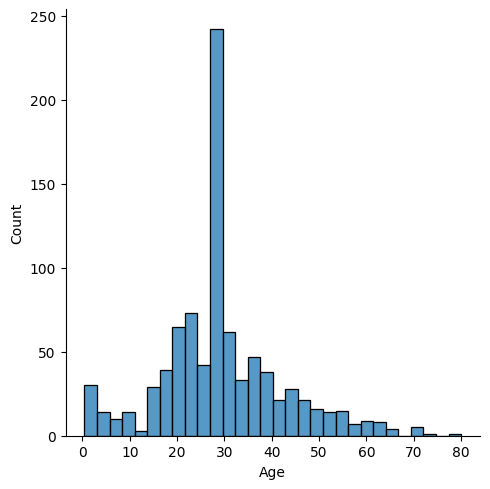

In [ ]:
sns.displot(data["Age"])

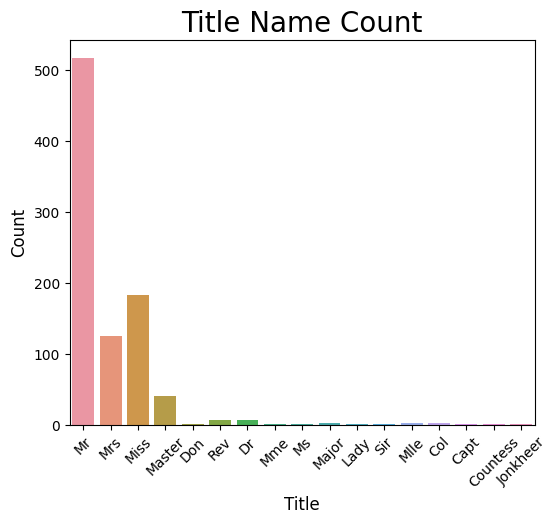

In [ ]:
df_train["Title"]=df_train["Name"].apply(lambda x: re.search(' ([A-Z][a-z]+)\.',x).group(1))
plt.figure(figsize=(6,5))
sns.countplot(x="Title", data=df_train)
plt.xlabel("Title", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Title Name Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()


In [ ]:
titles = df_train["Name"].apply(lambda x: re.search(' ([A-Z][a-z]+)\.',x).group(1))

Title_Status = {
    "Capt":"Officer", 
    "Col":"Officer",
    "Major":"Officer",
    "Dr":"Officer",
    "Rev":"Officer", 
    "Jonkheer":"Royalty",
    "Don":"Royalty",
    "Sir":"Royalty",
    "Lady":"Royalty",
    "the Countess":"Royalty",
    "Dona": "Royalty",
    "Mme":"Mrs",
    "Ms":"Mrs",
    "Mrs":"Mrs",
    "Mlle":"Ms",
    "Miss":"Ms",
    "Mr":"Mr",
    "Master":"Master"
}

df_train["Title"]=titles.map(Title_Status)

print("Chance of survival based on status: ")
print(df_train.groupby("Title")["Survived"].mean())




Chance of survival based on status: 
Title
Master     0.575000
Mr         0.156673
Mrs        0.795276
Ms         0.701087
Officer    0.277778
Royalty    0.500000
Name: Survived, dtype: float64


In [ ]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)


% of women who survived: 0.7420382165605095


In [ ]:
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [269]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex","Embarked"]

for col in cols:
    data[col]=le.fit_transform(data[col])
    test[col]=le.transform(test[col])
    print(le.classes_)

data.head(5)

[0 1]
[0 1 2 3]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [270]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in data.columns:
    if col in ['Embarked', 'Sex']:
        continue
    # Fit the scaler to the column
    scaler.fit(data[[col]])
    # Transform the column using the scaler
    data[col] = scaler.transform(data[[col]])

for col in test.columns:
    if col in ['Embarked', 'Sex']:
        continue
    # Fit the scaler to the column
    scaler.fit(test[[col]])
    # Transform the column using the scaler
    test[col] = scaler.transform(test[[col]])


In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y=data["Survived"]
x=data.drop("Survived", axis=1)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [396]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(x_train, y_train)

In [395]:
from sklearn.metrics import accuracy_score

predictions=clf.predict(x_val) 
accuracy_score(y_val, predictions)

NameError: name 'clf' is not defined

In [397]:
submission_preds=clf.predict(test)
print(submission_preds.shape)

(418,)


In [ ]:
df=pd.DataFrame({"PassengerId":test_ids.values,"Survived":submission_preds,})

In [ ]:
df.to_csv("submission.csv", index=False)

In [ ]:
train_data = pd.read_csv("train.csv")
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [405]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

num_params = len(test.columns)
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(num_params, )))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# train the model
model.fit(x_train, y_train, epochs=100, batch_size=15)


Epoch 1/100
48/48 [==============================] - 3s 5ms/step - loss: 0.6699 - accuracy: 0.5843
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 0.5763 - accuracy: 0.6376
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 0.5338 - accuracy: 0.7739
Epoch 4/100
48/48 [==============================] - 0s 4ms/step - loss: 0.5047 - accuracy: 0.7921
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 0.4845 - accuracy: 0.7978
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.4712 - accuracy: 0.7935
Epoch 7/100
48/48 [==============================] - 0s 6ms/step - loss: 0.4640 - accuracy: 0.7992
Epoch 8/100
48/48 [==============================] - 0s 4ms/step - loss: 0.4563 - accuracy: 0.7978
Epoch 9/100
48/48 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 0.8090
Epoch 10/100
48/48 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 0.8020
Epoch 11/

In [406]:
val_predictions = model.predict(x_val)
val_predictions = val_predictions.round()

correct = 0
for i in range(len(y_val)):
    if y_val.iloc[i] == val_predictions[i]:
        correct += 1
accuracy = correct / len(y_val)

print(accuracy)

6/6 [==============================] - 0s 2ms/step
0.8156424581005587


In [407]:

surivival_prediction = model.predict(test)

surivival_prediction = surivival_prediction.round()
df = pd.DataFrame({"PassengerId":test_ids.values,"Survived":tf.reshape(surivival_prediction, [-1])})
df.to_csv("submission.csv", index=False)

14/14 [==============================] - 0s 2ms/step
